In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import requests

In [4]:
gdf = gpd.read_file("/Users/ehast/Downloads/Statewide_Land_Use_Land_Cover")

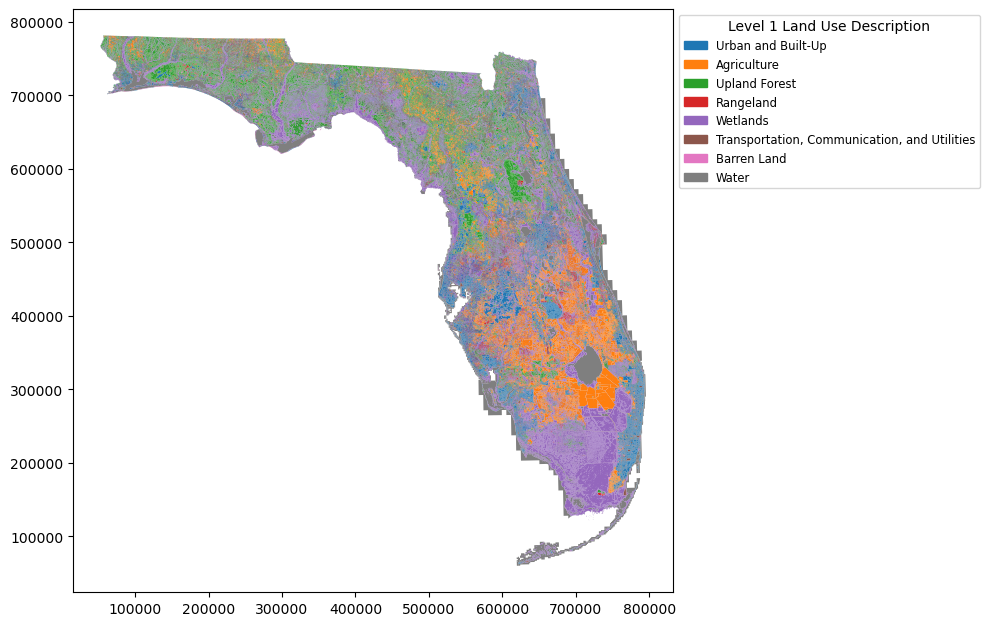

In [2]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Create a mapping of LEVEL1_LAN values to their descriptive names
landuse_mapping = dict(zip(gdf['LEVEL1_LAN'], gdf['LEVEL1_L_1']))

# Get a list of unique LEVEL1_LAN values
unique_values = gdf['LEVEL1_LAN'].unique()

# Create a colormap for the unique values
color_map = dict(zip(unique_values, mcolors.TABLEAU_COLORS))

# Loop through each group to plot
for code, group in gdf.groupby('LEVEL1_LAN'):
    color = color_map[code]
    group.plot(ax=ax, color=color)

# Create custom patches for the legend using the descriptive names
legend_patches = [Patch(color=color, label=landuse_mapping[code]) for code, color in color_map.items()]

# Set the legend outside the plot and reduce its font size
ax.legend(handles=legend_patches, title="Level 1 Land Use Description", loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#Census Data

In [9]:
url='https://api.census.gov/data/2020/dec/dhc'
params = {
    "get": 'NAME,P1_001N', 
    "for": "county:*",
    "in": "state:12",
    "key": "YOUR KEY"}
response = requests.get(url,params=params)

In [10]:
total_population=pd.DataFrame(response.json()[1:], columns=response.json()[0])
total_population

JSONDecodeError: Expecting value: line 2 column 1 (char 1)